# Basics Of SciPy

## INTRODUCTION

* SciPy stands for Scientific Python.

* SciPy is an open-source Python library which is used to solve scientific and mathematical problems.

* It is built on the NumPy extension and allows the user to manipulate and visualize data with a wide range of high-level commands.

* As mentioned earlier, SciPy builds on NumPy and therefore if you import SciPy, there is no need to import NumPy.

### There are SubPackages in Scipy
* 1.constants
* 2.cluster
* 3.fftpack (fast fourier transform)
* 4.integrate
* 5.interpolate
* 6.linalg
* 7.ndimage
* 8.odr (Orthogonal Distance Regression)
* 9.optimize
* 10.signal
* 11.sparse
* 12.spacial
* 13.stats

## CONSTANTS

In [140]:
from scipy import constants
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [141]:
# Constants
# It provides constants regarding physics and mathematics
# Constants are helpful in DataScience

print(constants.pi)   
print(constants.kilo)    # kilometers in meters
print(constants.milli)
print(constants.nano)
print(constants.kibi)    # kilo bytes
print(constants.gibi)
print(constants.mebi)
print(constants.atomic_mass)
print(constants.gram)
print(constants.degree)  # Degree to Radains
print(constants.hour)
print(constants.mile)
print(constants.light_year)
print(constants.atm)
print(constants.zero_Celsius)
print(constants.electron_volt)
print(constants.calorie)
print(constants.kilogram_force)

3.141592653589793
1000.0
0.001
1e-09
1024
1073741824
1048576
1.6605390666e-27
0.001
0.017453292519943295
3600.0
1609.3439999999998
9460730472580800.0
101325.0
273.15
1.602176634e-19
4.184
9.80665


In [142]:
# You Can find Units also
from scipy.constants import find
find('boltzmann')

['Boltzmann constant',
 'Boltzmann constant in Hz/K',
 'Boltzmann constant in eV/K',
 'Boltzmann constant in inverse meter per kelvin',
 'Stefan-Boltzmann constant']

In [143]:
# Basic Trignometric and exponential Functions
from scipy import special

print(special.exp10(3))
print(special.exp2(4))
print(special.sindg(0))
print(special.tandg(45))

1000.0
16.0
0.0
1.0


### CLUSTERS

* There are 3 types of clusters
* 1. Exclusive Clustering .  Ex :- K-means Clustering
* 2. OverLapping Clustering. Ex :- C-means/Fuzzy Clustering
* 3. Hierarchical Clustering.  

In [144]:
# K-Means Clustering
# Clustering Uses Un-supervised Learning in Machine learning
# K-Means is an Un-supervised algorithm , it performs 2 tasks
# 1. Determines the best value of K center points or centriod 
# 2. Assigns each data point to its closest k-center . hence, each cluster has data points.

In [145]:
# Steps to follow for K-means algorithm

# 1. Select the Number K ( K = Number of Clusters )
# 2. Selecing random data points 
# 3. Assigning datapoints to their nearest centroid
# 4. Calculate Variance and place a new centriod 
# 5. Again assign datapoints to nearest cluster
# 6. Again calculating Variance and placing a new centroid
# 7. It will take best one

In [146]:
# Elbow Method is used for determining the K value
# It Uses WCSS(Within Cluster Sum Of Squares) for determining the variance in the data points.
data = pd.read_csv(r"C:\Users\91891\Downloads\archive (1)\Mall_Customers.csv")

In [147]:
# Extracting Independent Variables
x = data.iloc[:,[3,4]].values  # Extracting 3 and 4 column index

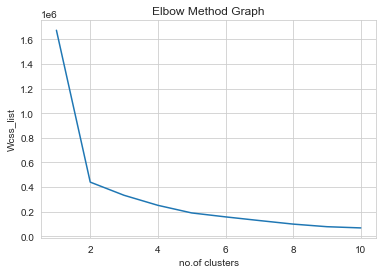

In [148]:
# Finding K value now
# Checking K values from 1 to 10 (It is done with for loop)

from sklearn.cluster import KMeans 

WCSS_LIST = []  # Intialising the list

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state = 42) # random state ensures that the randomness of data are generated in an order
    kmeans.fit(x)   # fitting data 
    WCSS_LIST.append(kmeans.inertia_)   # Calculating Wcss and appending to above list

plt.plot(range(1,11), WCSS_LIST)        # Plottings K versus WCSS
plt.title('Elbow Method Graph')
plt.xlabel('no.of clusters')
plt.ylabel('Wcss_list')
plt.show()

In [149]:
# Now We Got the K-Value i.e, 5 (bcz graph was bend totally at point 5)
# Now, We have to train the Dataset

kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_predict = kmeans.fit_predict(x)  # Here, y_predict is dependent variable on x

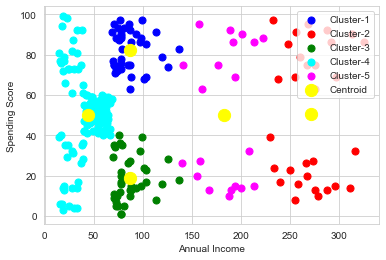

In [150]:
# Now , Finally Visualising the Clusters
import matplotlib.pyplot as plt

plt.scatter(x[y_predict == 0,0], x[y_predict == 0,1],s = 50, color ='blue' , label = 'Cluster-1')
plt.scatter(x[y_predict == 1,0], x[y_predict == 1,1],s = 50, color ='red' , label = 'Cluster-2')
plt.scatter(x[y_predict == 2,0], x[y_predict == 2,1],s = 50, color ='green' , label = 'Cluster-3')
plt.scatter(x[y_predict == 3,0], x[y_predict == 3,1],s = 50, color ='cyan' , label = 'Cluster-4')
plt.scatter(x[y_predict == 4,0], x[y_predict == 4,1],s = 50, color ='magenta' , label = 'Cluster-5')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s= 150, color = 'yellow', label = 'Centroid')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend(loc = 'upper right')
plt.show()

## FFT AND IFFT

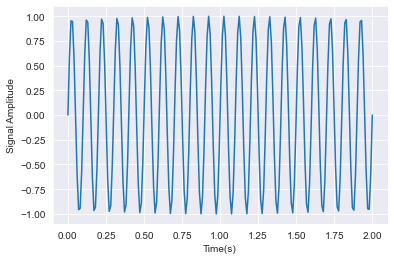

In [151]:
# Fast Fourier Transforms (fft and ifft)
# This are used in measurement method in science of audio and acoustics measurements.
# It is a algorithm is used to convert a digital signal from time domain into a signal in frequency domain.

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
sns.set_style("darkgrid")

# Frequency in Hz
freq = 10

#Sample rate
freq_sample = 100

x = np.linspace(0,2,2 * freq_sample)
y = np.sin(freq * 2 * np.pi*x)
plt.plot(x,y)
plt.xlabel("Time(s)")
plt.ylabel("Signal Amplitude")
plt.show()

In [152]:
from scipy.fftpack import fft,ifft

x = np.array([1,2,3,4])
y = fft(x)
print(y)
print('------------------------------------')
a = np.array([0,1,2,3])
b = ifft(a)     # Inverse of FFT
print(b)

[10.-0.j -2.+2.j -2.-0.j -2.-2.j]
------------------------------------
[ 1.5-0.j  -0.5-0.5j -0.5-0.j  -0.5+0.5j]


## INTEGRATE

In [153]:
from scipy import integrate
help(integrate.quad)

Help on function quad in module scipy.integrate.quadpack:

quad(func, a, b, args=(), full_output=0, epsabs=1.49e-08, epsrel=1.49e-08, limit=50, points=None, weight=None, wvar=None, wopts=None, maxp1=50, limlst=50)
    Compute a definite integral.
    
    Integrate func from `a` to `b` (possibly infinite interval) using a
    technique from the Fortran library QUADPACK.
    
    Parameters
    ----------
    func : {function, scipy.LowLevelCallable}
        A Python function or method to integrate. If `func` takes many
        arguments, it is integrated along the axis corresponding to the
        first argument.
    
        If the user desires improved integration performance, then `f` may
        be a `scipy.LowLevelCallable` with one of the signatures::
    
            double func(double x)
            double func(double x, void *user_data)
            double func(int n, double *xx)
            double func(int n, double *xx, void *user_data)
    
        The ``user_data`` is the d

In [154]:
# Integration with one variable
from scipy import integrate
import scipy
a = scipy.integrate.quad(lambda x : x**2 , 0,1)
a

(0.33333333333333337, 3.700743415417189e-15)

In [155]:
# Integration with Two variables
y = lambda x,y : x*y**3
x1 = lambda x : 1
x2 = lambda x : -1
integrate.dblquad(y,0,2,x1,x2)

(-0.0, 8.791154598512528e-14)

## INTERPOLATE

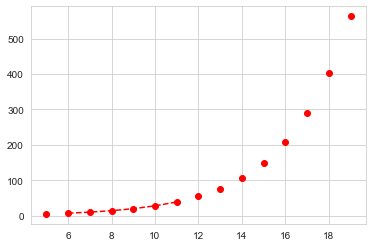

In [156]:
from scipy import interpolate     # By this we can get accurate datapoint points
import seaborn as sns
sns.set_style("whitegrid")

x = np.arange(5,20)
y = np.exp(x/3)
f = interpolate.interp1d(x,y)
x1 = np.arange(6,12)
y1 = f(x1)
plt.plot(x,y, 'o', x1,y1, '--',c ='red')
plt.show()

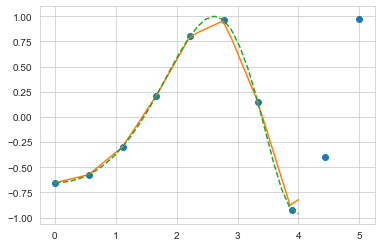

In [157]:
# Linear, cubic Interpolation

from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
x = np.linspace(0,5,10)
y = np.cos(x**2/3+4)

f1 = interp1d(x, y, kind = 'linear')
f2 = interp1d(x, y, kind = 'cubic')

xnew = np.linspace(0,4,30)

plt.plot(x,y,'o',xnew, f1(xnew), '-',xnew, f2(xnew), '--')
plt.show()

# LINEAR ALGEBRA

In [158]:
from scipy import linalg
# Solving Equations through linear algebra
# x + 2y + 3z = 2
# 2x + 3y + z = 3
# 3x + 2y + 5z = 6

a = np.array([[1,2,3],[2,3,1],[3,2,5]])
b = np.array([[2], [3] ,[6]])

x = linalg.solve(a,b)
print(x)
# For Checking Its Correct or Not
print('For Checking')
print(a.dot(x)-b) # If all are zeros then its correct

[[ 1.75]
 [-0.25]
 [ 0.25]]
For Checking
[[0.]
 [0.]
 [0.]]


In [159]:
# Determinent

A = np.array([[1,2], [4,3]])
B = linalg.det(A)                # Determinent
print(B)
print('------------------')
A = np.array([[1,2], [4,3]])
B = linalg.inv(A)                # Inverse of A
print(B)
print('------------------')
A = np.array([[1,2], [4,3]])
B = linalg.eigh(A)               # Eigen Values
print(B)

-5.0
------------------
[[-0.6  0.4]
 [ 0.8 -0.2]]
------------------
(array([-2.12310563,  6.12310563]), array([[-0.78820544,  0.61541221],
       [ 0.61541221,  0.78820544]]))


## NDIMAGE

In [160]:
# It is used for image processing and analysis.
# we can do cropping, flipping, rotating the image
# and also labeling pixels corresponding to differnet objects
# If You wanna upload your own image try this : imageio.imread('path of your image') (* Import imageio)

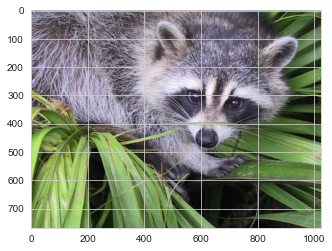

In [161]:
import matplotlib.pyplot as plt
import scipy
face = scipy.misc.face()

plt.imshow(face)
plt.show()

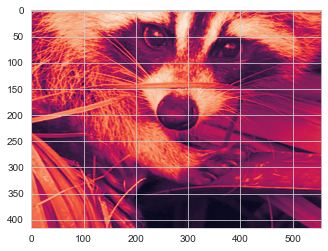

In [162]:
from scipy import misc
face = misc.face(gray = True)
x, y = face.shape
 
# Cropping the image
crop = face[x//3: - x//8, y//3: - y//8]
import matplotlib.pyplot as plt
plt.imshow(crop)
plt.show()

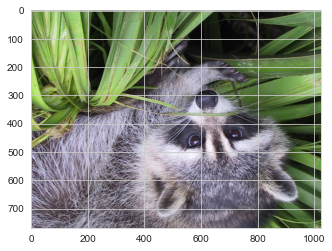

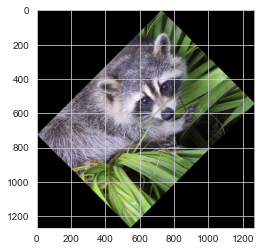

In [163]:
# Flipping And Rotating
from scipy import misc, ndimage
import numpy as np
import matplotlib.pyplot as plt

face = misc.face()
flip = np.flipud(face)
plt.imshow(flip)
plt.show()

rotate = ndimage.rotate(face, 45)
plt.imshow(rotate)
plt.show()

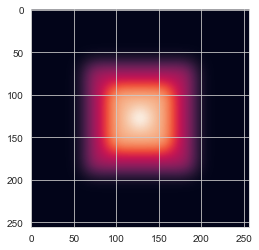

In [164]:
# Edge Detection (Used in Image Processing , Computer Vision And Machine Vision)

import scipy.ndimage as nd
import numpy as np

im = np.zeros((256, 256))
im[64:-64, 64:-64] = 1
im[90:-90,90:-90] = 2
im[120:-120,120:-120] = 3
im = ndimage.gaussian_filter(im, 10)
plt.imshow(im)
plt.show()

## SPARSE


In [165]:
# Sparse is a data which contain un-used data in the form of zeros in an array
# In Sporse there is a CSR Matrix we have to import it
from scipy.sparse import csr_matrix as c

In [166]:
array = np.array([0,0,1,0,0,1,3,4,5,0])
print(c(array))         # (row index , column index)   - Value in array (output in the form of)
print('---------------------------')
array1 = np.array([[1,2,3],[4,5,6],[7,8,9]])
print(c(array1))

  (0, 2)	1
  (0, 5)	1
  (0, 6)	3
  (0, 7)	4
  (0, 8)	5
---------------------------
  (0, 0)	1
  (0, 1)	2
  (0, 2)	3
  (1, 0)	4
  (1, 1)	5
  (1, 2)	6
  (2, 0)	7
  (2, 1)	8
  (2, 2)	9


# STATS

In [167]:
# Stats means statistics
# We can perform anything in statistics with the help of this submodule

from scipy import stats

In [168]:
info(stats)

.. _statsrefmanual:

Statistical functions (:mod:`scipy.stats`)

.. currentmodule:: scipy.stats

This module contains a large number of probability distributions,
summary and frequency statistics, correlation functions and statistical
tests, masked statistics, kernel density estimation, quasi-Monte Carlo
functionality, and more.

Statistics is a very large area, and there are topics that are out of scope
for SciPy and are covered by other packages. Some of the most important ones
are:

- `statsmodels <https://www.statsmodels.org/stable/index.html>`__:
  regression, linear models, time series analysis, extensions to topics
  also covered by ``scipy.stats``.
- `Pandas <https://pandas.pydata.org/>`__: tabular data, time series
  functionality, interfaces to other statistical languages.
- `PyMC3 <https://docs.pymc.io/>`__: Bayesian statistical
  modeling, probabilistic machine learning.
- `scikit-learn <https://scikit-learn.org/>`__: classification, regression,
  model selection.
- `Seabor

In [169]:
from scipy.stats import norm
arr = np.array([1,2,3,4,5,6])
print(norm.cdf(arr))              # Cdf :- Cummulative Distributive Function

[0.84134475 0.97724987 0.9986501  0.99996833 0.99999971 1.        ]


In [170]:
# Laplace in Stats
from scipy.stats import laplace

lp = laplace(2,3)
print(lp)

In [171]:
# min, max ,mean and variance in stats
from scipy.stats.mstats import gmean,hmean
print(arr.min())
print(arr.max())
print(arr.mean())
print(arr.var())
print(gmean(arr))   # Geometric Mean
print(hmean(arr))   # Harmonic Mean

1
6
3.5
2.9166666666666665
2.993795165523909
2.4489795918367347


In [172]:
# Bernoullis in stats
# Bernoulli Random Variate Samples
# The Bernoulli distribution is a discrete distribution having two possible outcomes success of failure.

from scipy.stats import bernoulli, binom 

bernoulli.rvs(p = 0.6, size = 2)  # p - probability , size is 2 of an array (to conduct)

array([0, 0])

In [173]:
bernoulli.rvs(p = 0.3, size = 10)

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [174]:
# Probability of 5 heads after 10 throws with a fair coin
binom.pmf(k=5, n=10, p=0.5)
# n is number of times conducting
# p is probability
# k is for number of heads after conducting 10 times

0.24609375000000003